# Basic SWB version 2.0 run - INPUT DATA SETS AND GRIDS

In [2]:
import os
import numpy as np
import pandas as pd
import gdal

%run plot_and_table_functions.py

# lookup table path and filenames
lu_lookup_fname  = '../std_input/Landuse_lookup_CDL.txt'
irr_lookup_fname = '../std_input/Irrigation_lookup_CDL.txt'

# grid files
lu_gridfile_fname              = '../input/landuse.asc'
soils_gridfile_fname           = '../input/hydrologic_soils_group.asc'
awc_gridfile_fname             = '../input/available_water_capacity.asc'
flow_dir_gridfile_fname        = '../input/d8_flow_direction.asc'
irrigation_mask_gridfile_fname = '../input/irrigation_mask_from_cdl.asc' 

lu_grid_fname    = '../input/landuse.asc'
control_file     = '../central_sands_swb2.ctl'

In [3]:
# open table files
lu_lookup     = pd.read_table( lu_lookup_fname )
irr_lookup    = pd.read_table( irr_lookup_fname )

In [4]:
# read in grid values - using 'read_raster' function taken from Andy Leaf's
# GISio.py package: https://github.com/aleaf/GIS_utils
lu_data, ly_gt, lu_proj, lu_xy                = read_raster( lu_gridfile_fname )
soils_data, soils_gt, soils_proj, soils_xy    = read_raster( soils_gridfile_fname )
awc_data, awc_gt, awc_proj, awc_xy            = read_raster( awc_gridfile_fname )
d8_data, d8_gt, d8_proj, d8_xy                = read_raster( flow_dir_gridfile_fname )
irr_data, irr_gt, irr_proj, irr_xy            = read_raster( irrigation_mask_gridfile_fname )


reading in ../input/landuse.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ../input/hydrologic_soils_group.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ../input/available_water_capacity.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ../input/d8_flow_direction.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ../input/irrigation_mask_from_cdl.asc into numpy array...
creating a grid of xy coordinates in the original projection...


## Plots of Input Grids

### Irrigation mask; 1=irrigation on, 0=irrigation off

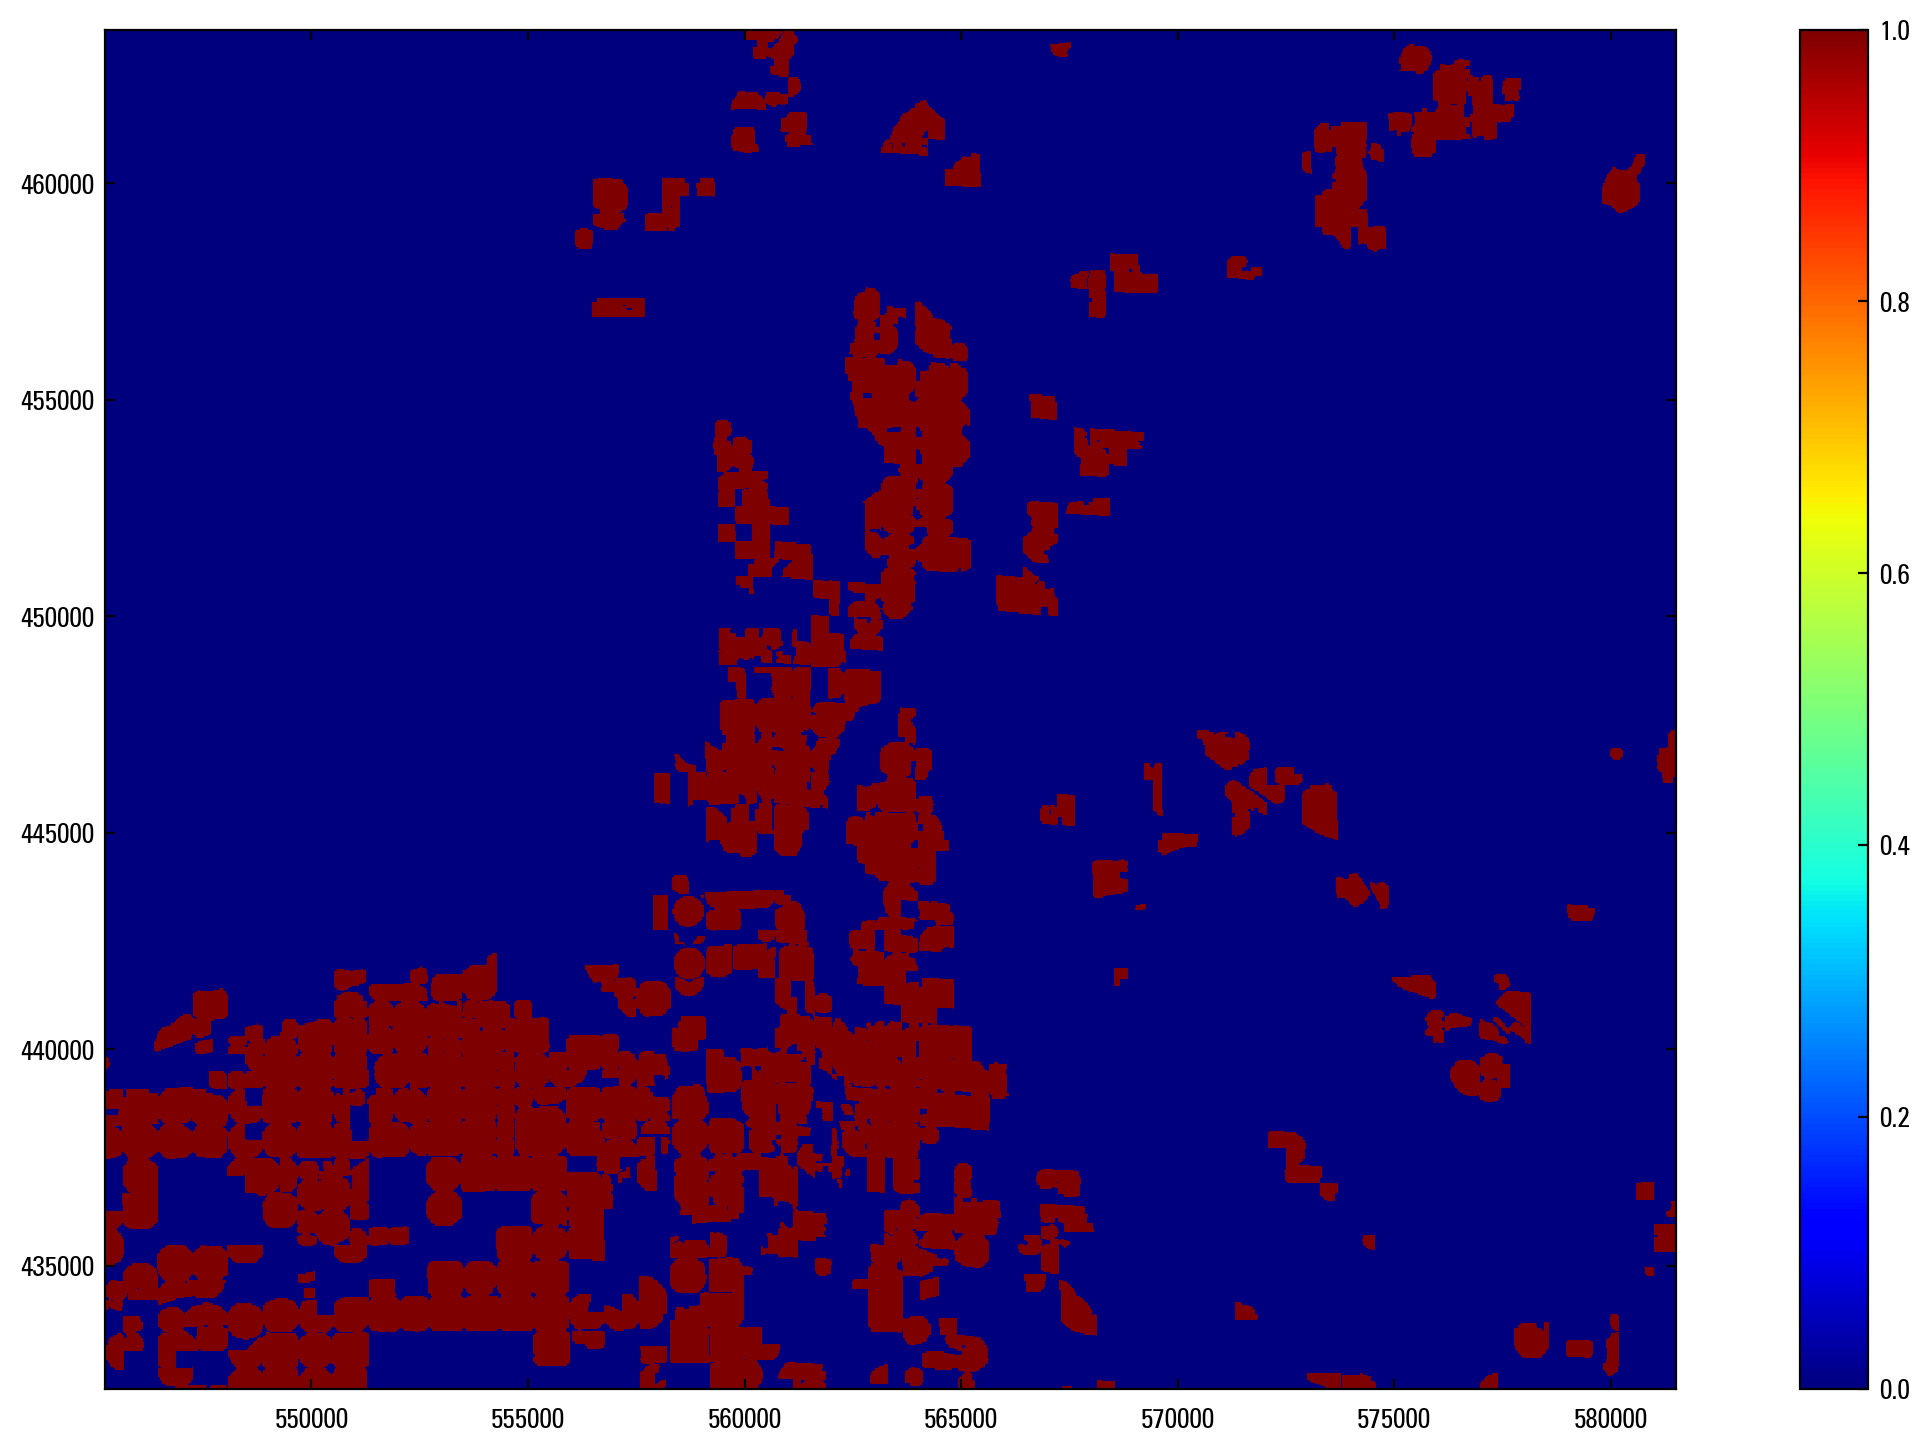

In [5]:
make_plot( x=irr_xy[0], y=irr_xy[1], var=irr_data )

### Plot of D8 Flow Direction

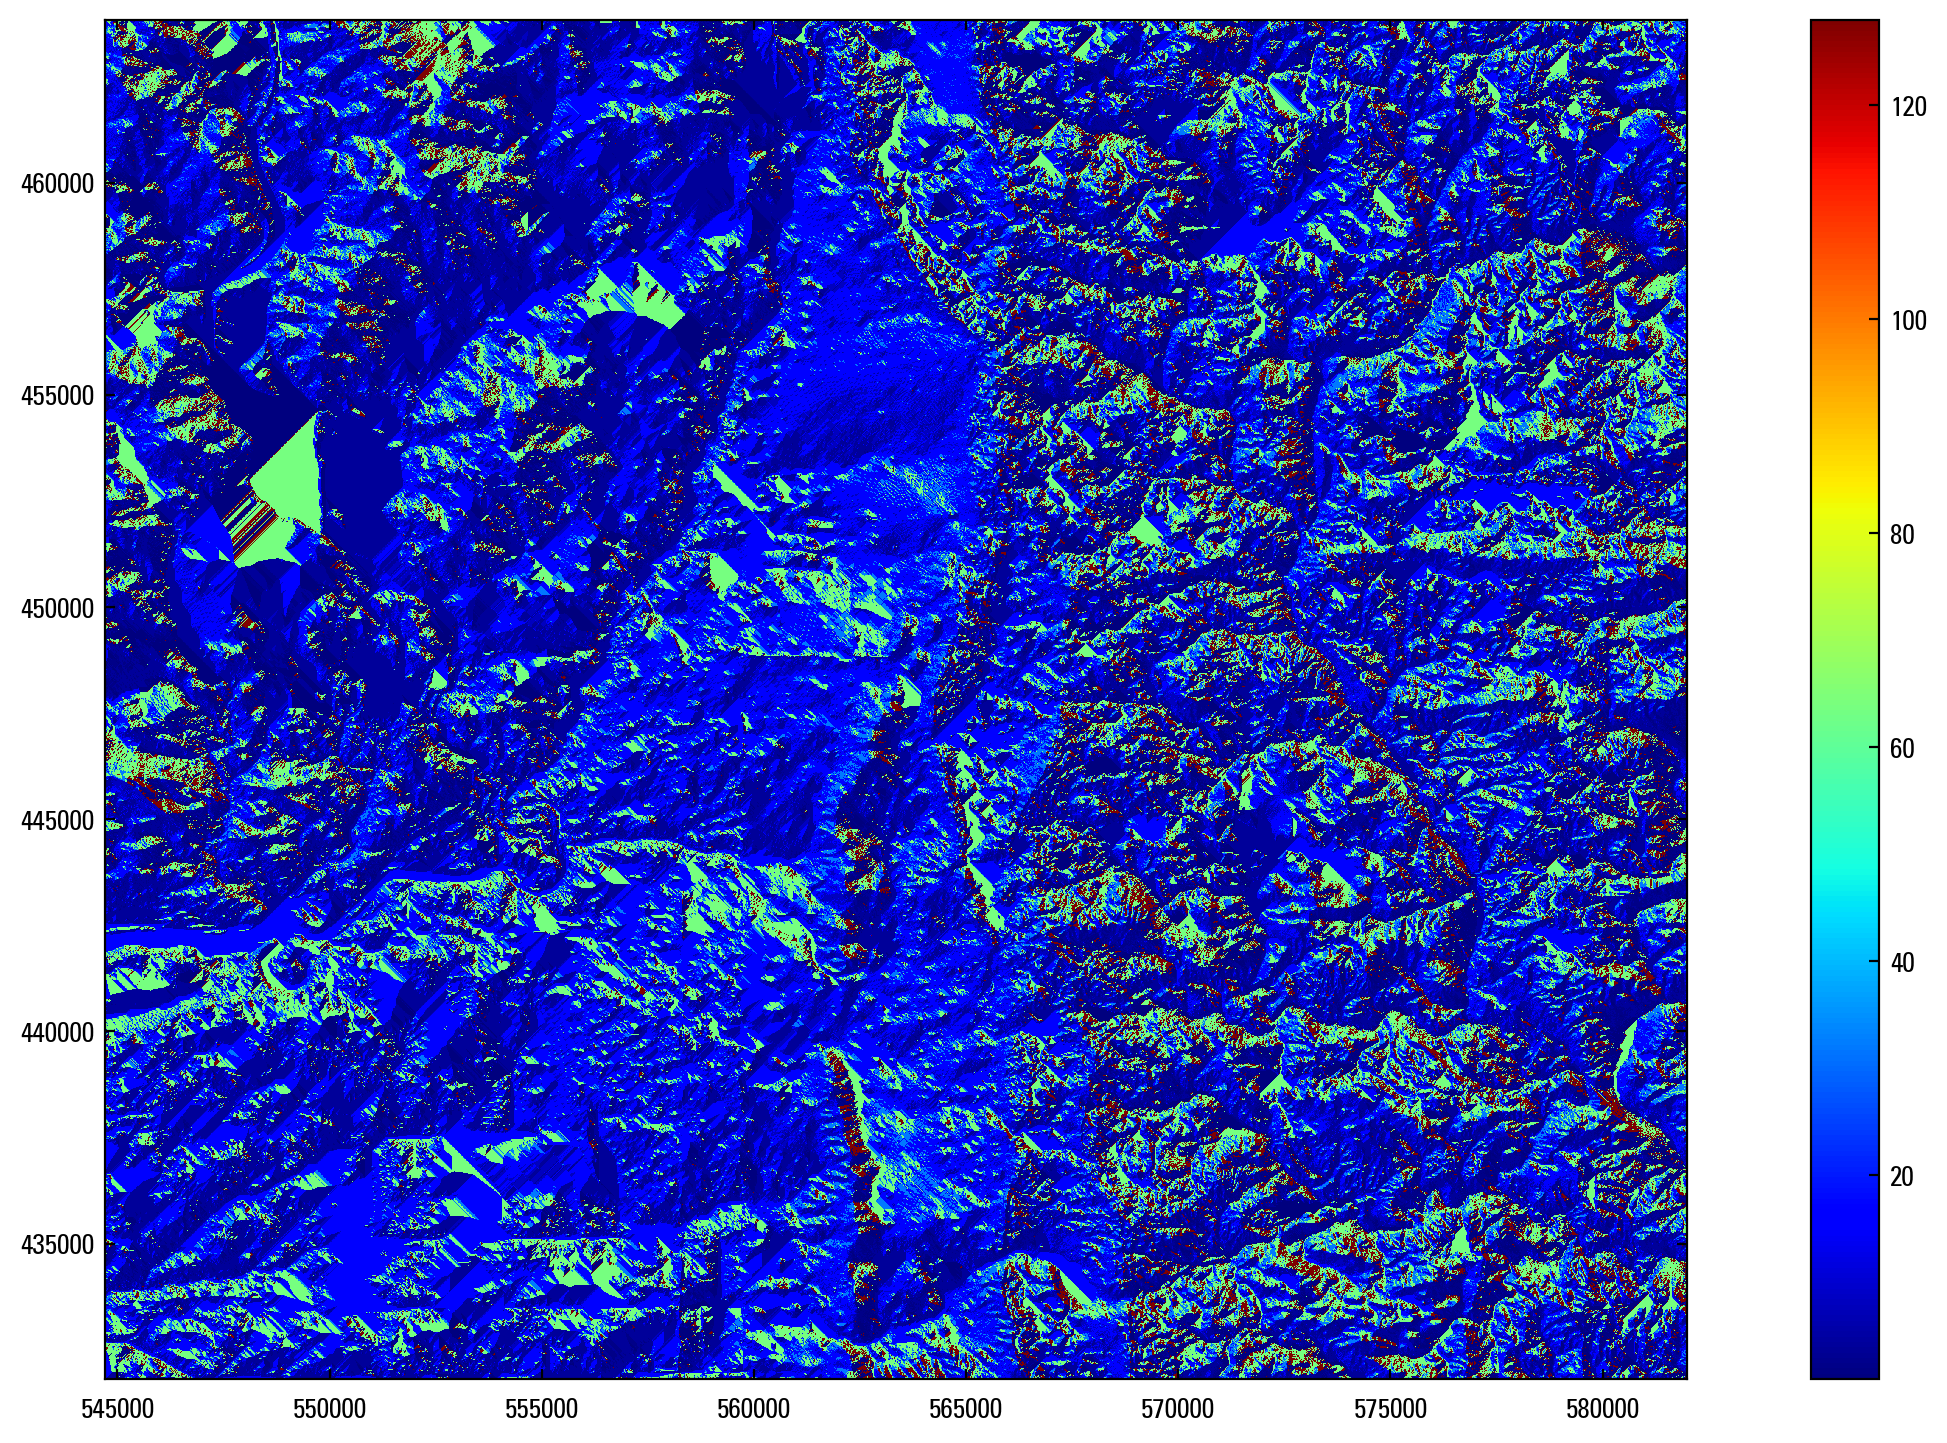

In [6]:
make_plot( x=d8_xy[0], y=d8_xy[1], var=d8_data )

### Plot of Available Water Content

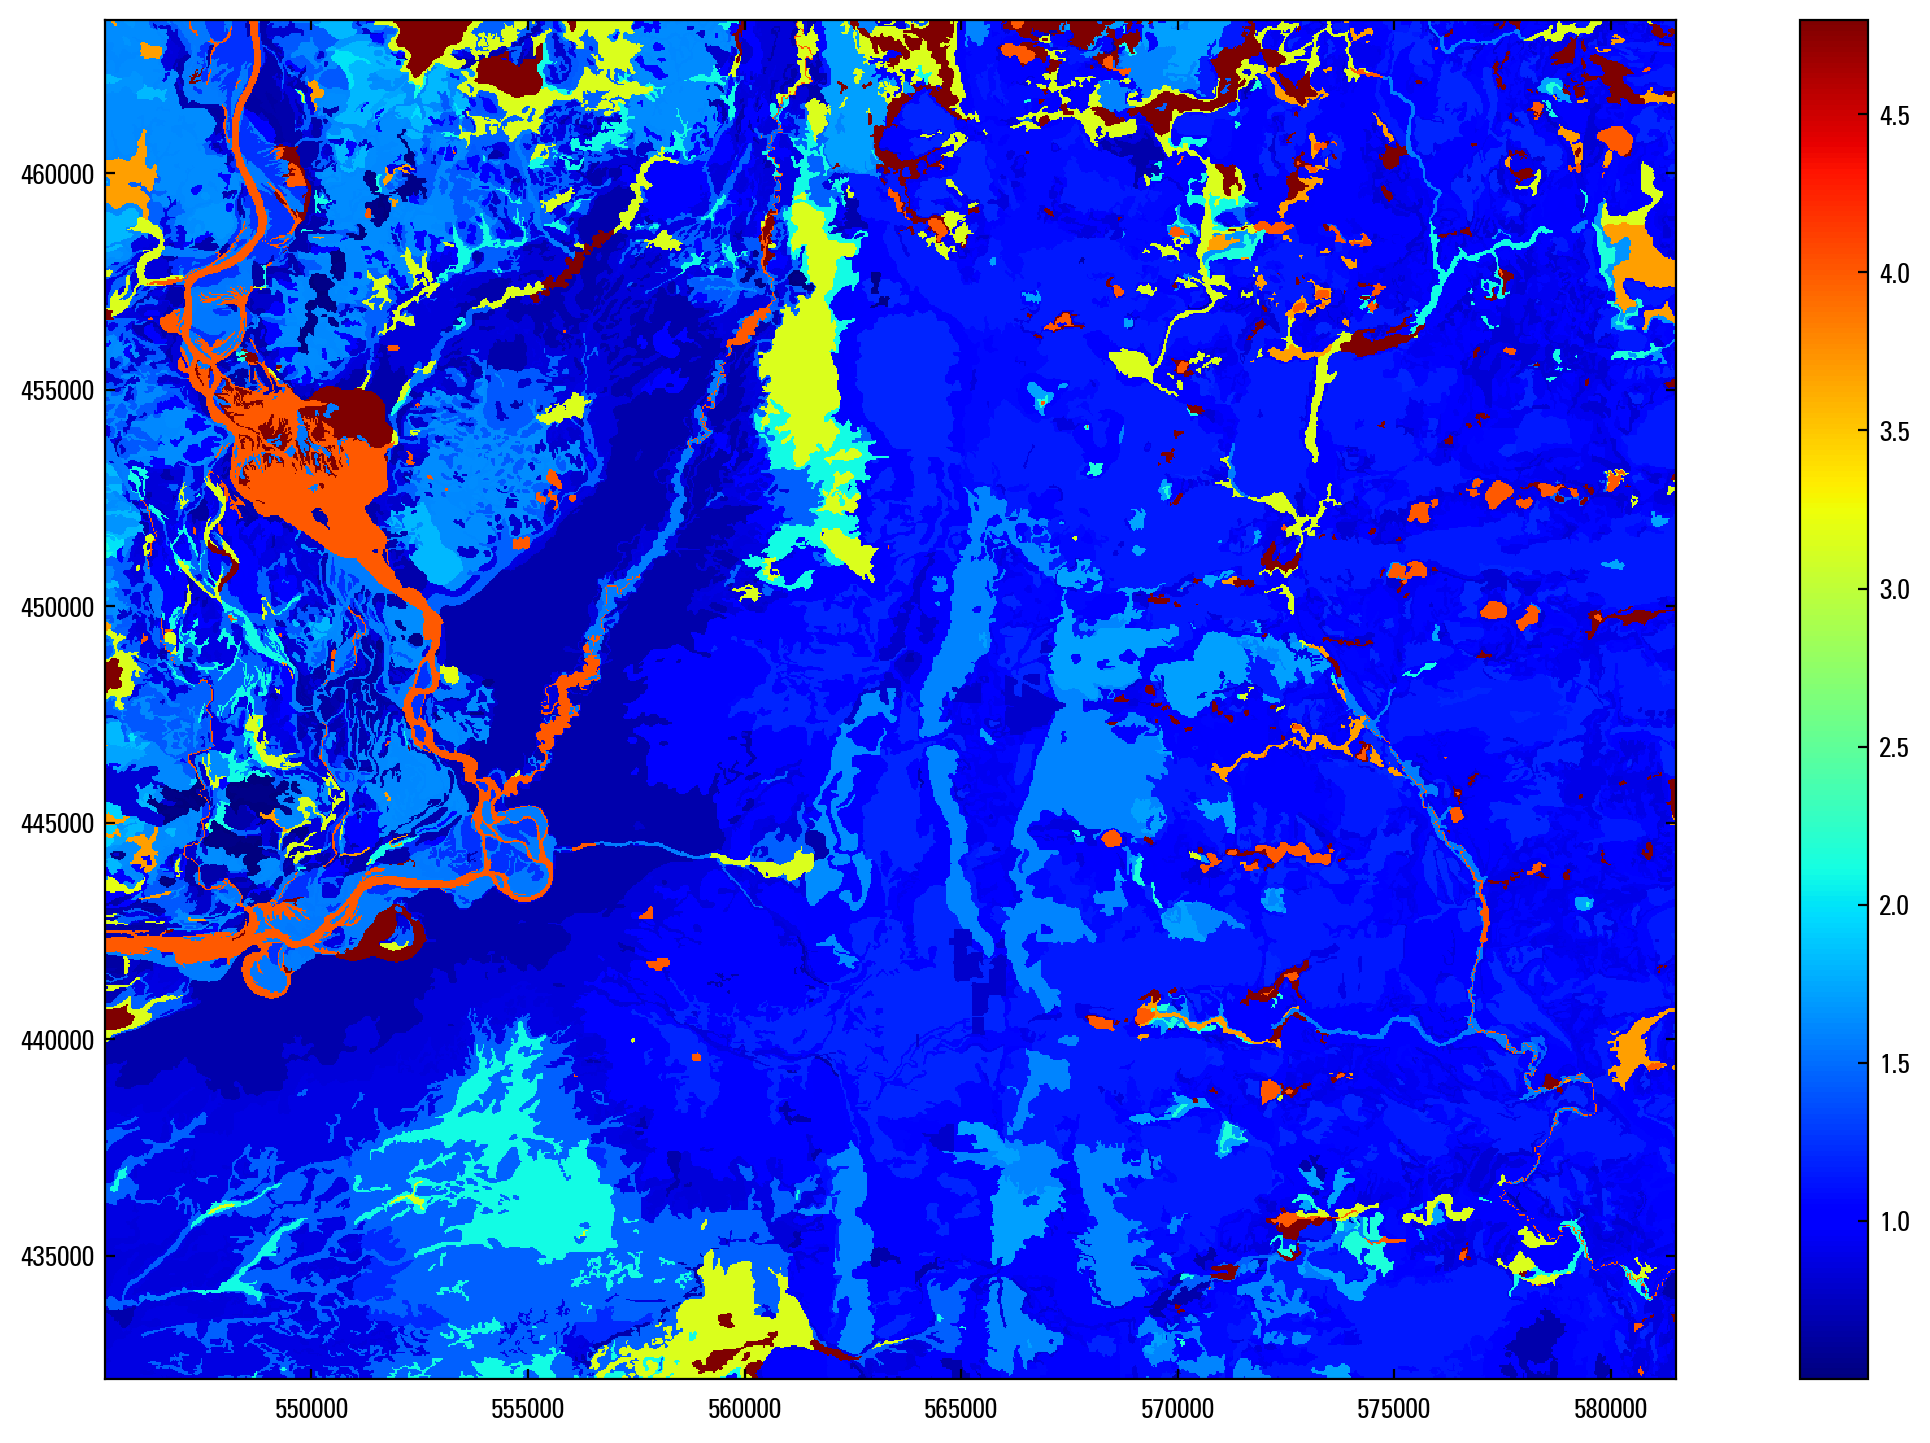

In [7]:
make_plot( x=awc_xy[0], y=awc_xy[1], var=awc_data )

### Plot of Hydrologic Soils Groups

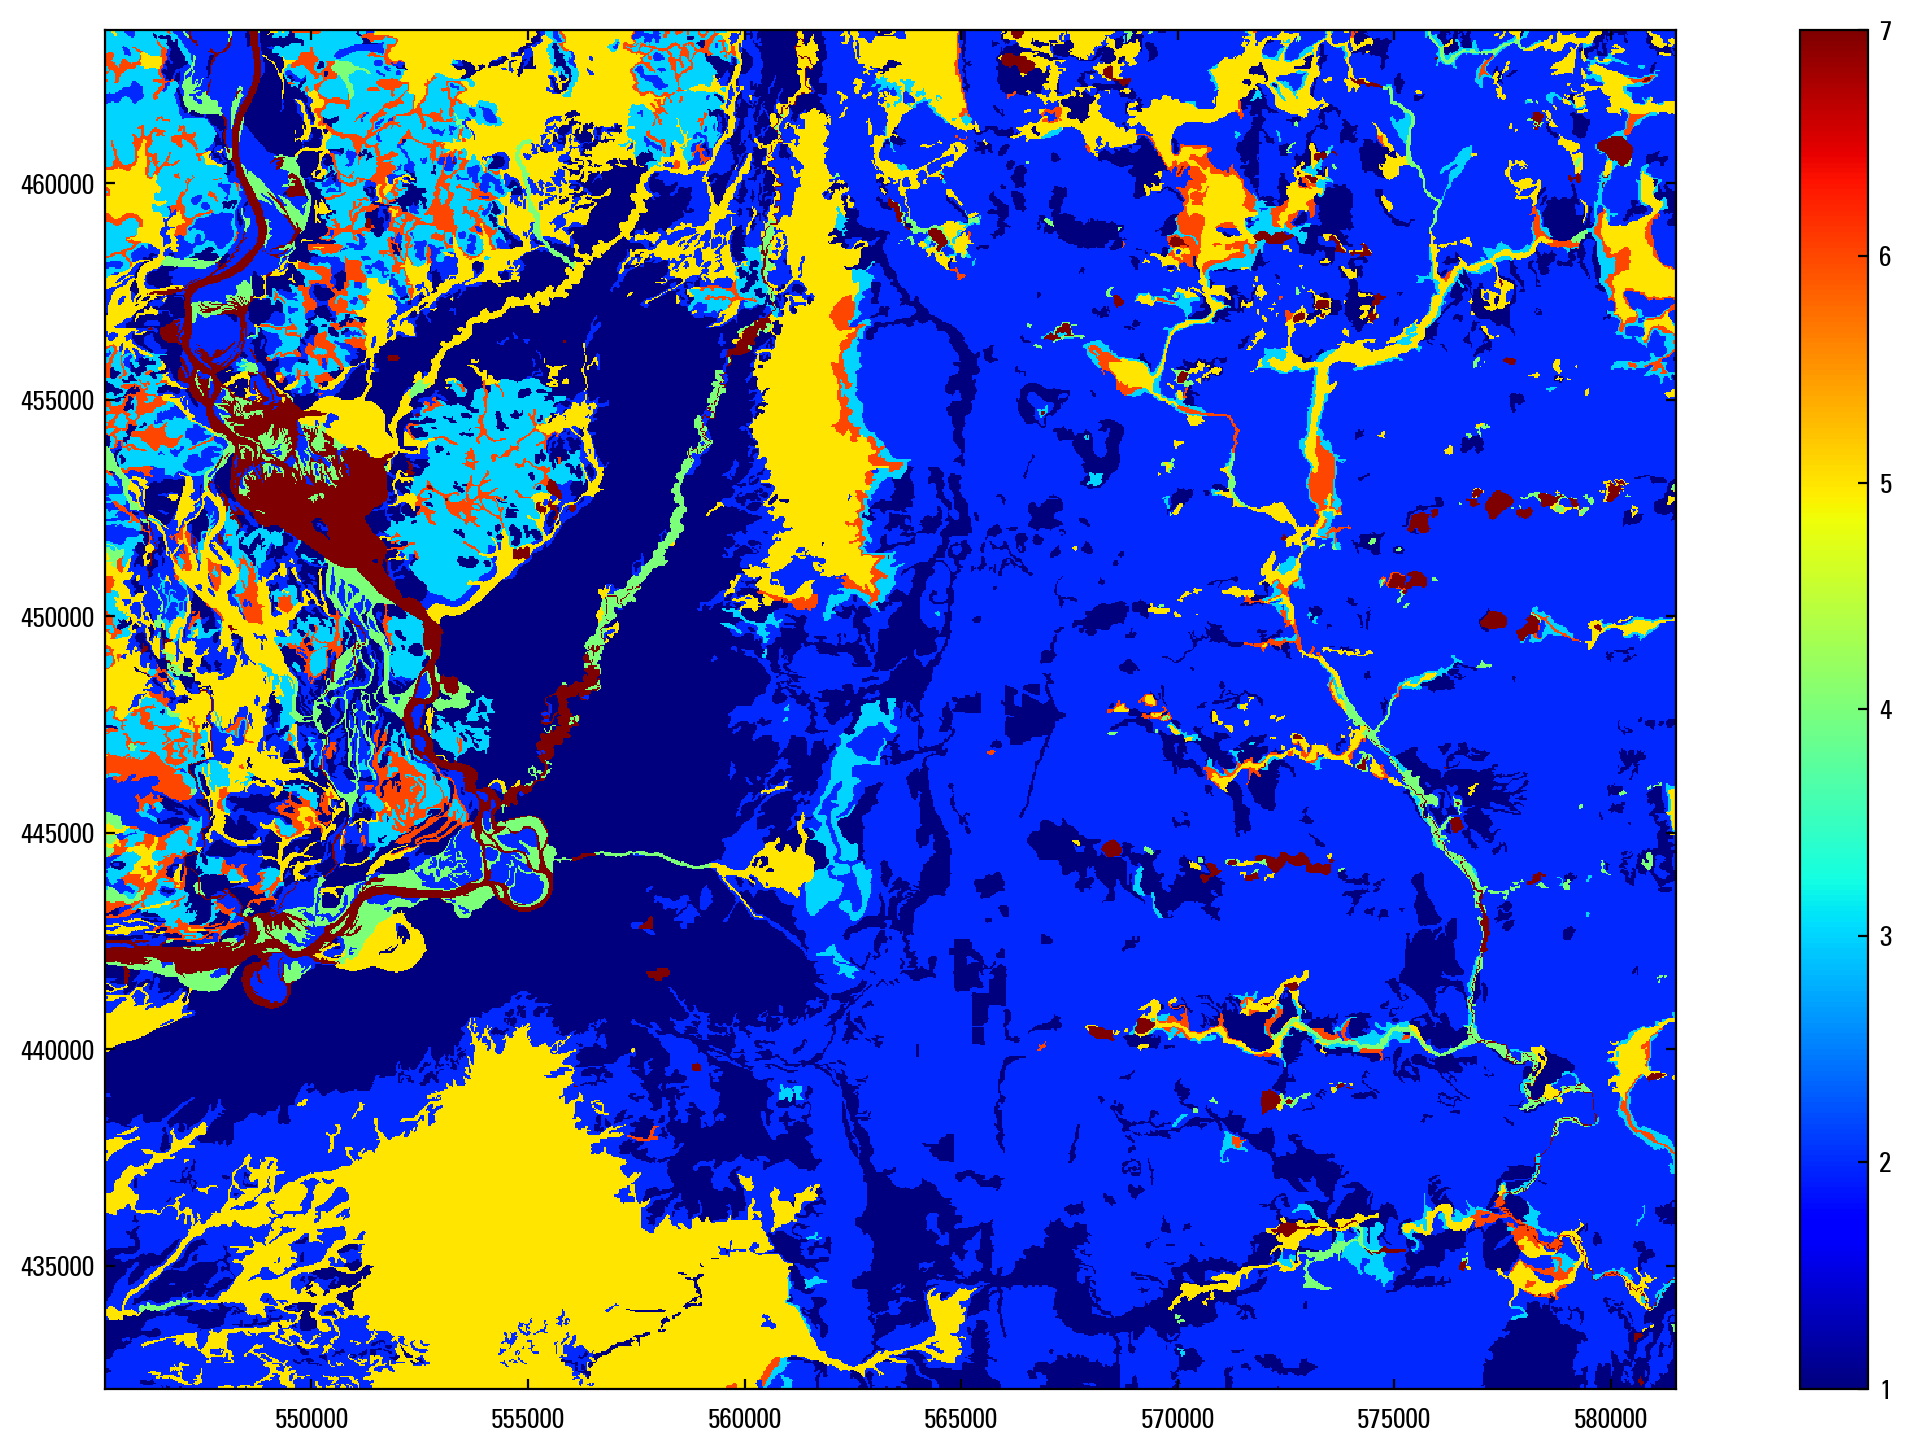

In [8]:
make_plot( x=soils_xy[0], y=soils_xy[1], var=soils_data )

/Users/smwesten/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


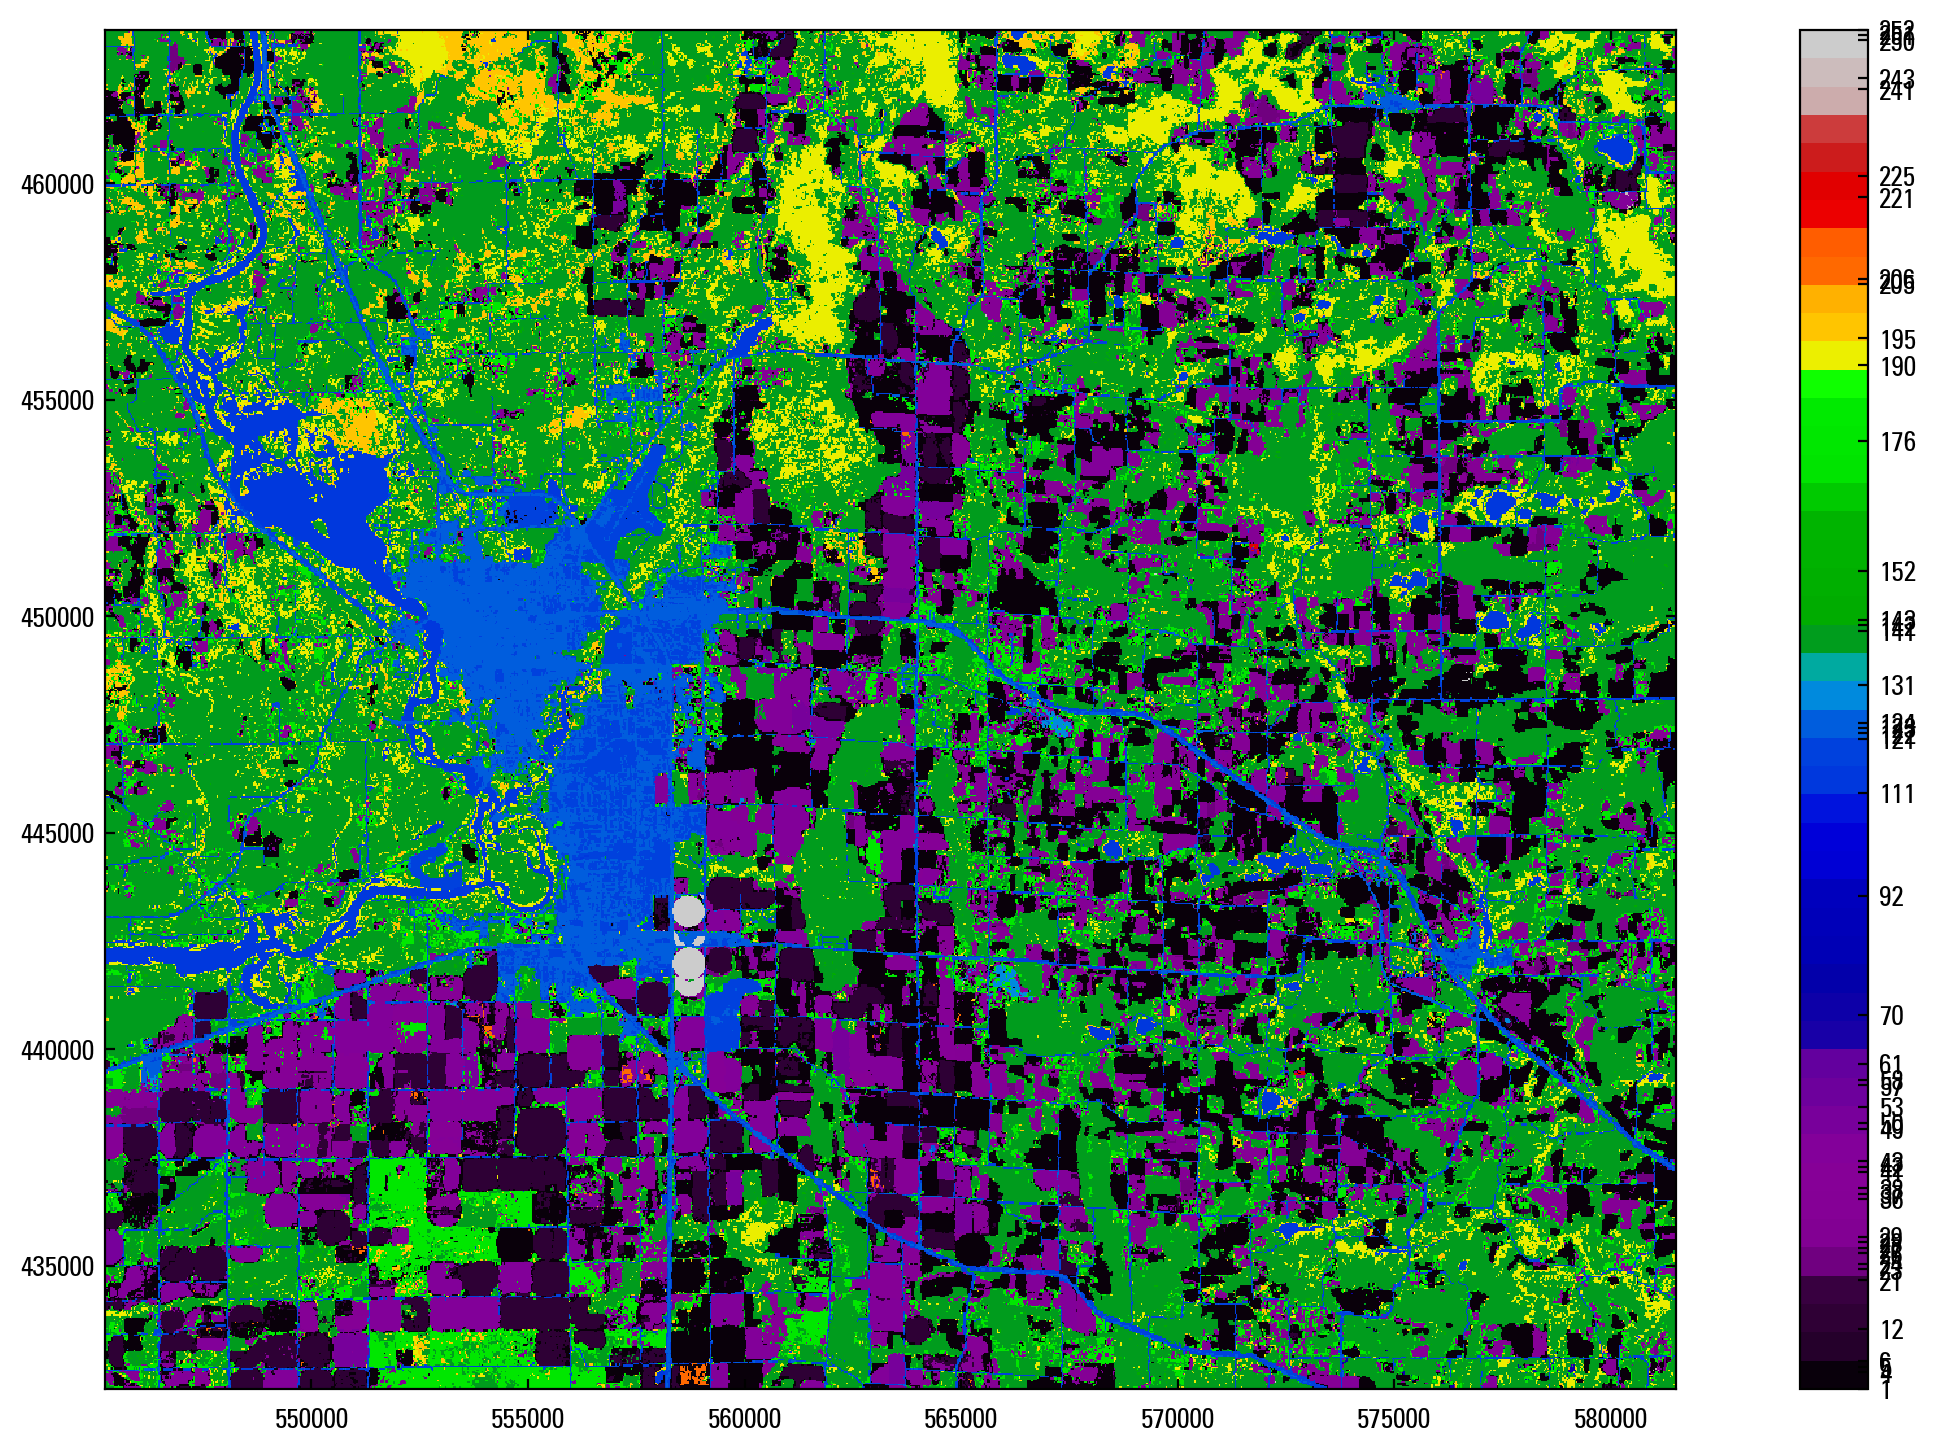

In [10]:
%run plot_and_table_functions.py
lu_cmap = discrete_irreg_cmap(discrete_vals=np.unique( lu_data.flatten()), base_cmap='spectral')
make_plot( x=lu_xy[0], y=lu_xy[1], var=lu_data, discrete=True, cmap=lu_cmap )